In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [75]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [76]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
data = np.array(data)
m,n = data.shape

np.random.shuffle(data)

data_test = data[0:1000].T

X_test = data_test[1:n]
Y_test = data_test[0]
X_test = X_test / 255.


data_train = data[1000:m].T
X_train = data_train[1:n]
X_train = X_train / 255.
Y_train = data_train[0]

_,m_train = X_train.shape

In [60]:
X_train.shape

(783, 27000)

In [82]:
def init_params():
    W1 = np.random.rand(128,784) - 0.5
    b1 = np.random.rand(128,1)- 0.5

    W2 = np.random.rand(10,128)- 0.5
    b2 = np.random.rand(10,1)- 0.5
    return W1,b1,W2,b2

In [68]:
def relu(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)
    return A


def relu_derivative(Z):
    return Z>0

In [69]:
def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)

    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [70]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [71]:
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * relu_derivative(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1,db1,dW2,db2

In [72]:
def update_params(W1,b1,W2,b2, dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

In [79]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    
    return np.sum(predictions == Y) / Y.size
    
def gradient_decent(X,Y,iterations,alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations):
        Z1 ,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2, dW1,db1,dW2,db2,alpha)
        
        print("iteration:-", i)
        predictions = get_predictions(A2)
        print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2

In [95]:
W1, b1, W2, b2 = gradient_decent(X_train,Y_train,500,0.1)

iteration:- 0
0.09378048780487805
iteration:- 1
0.10690243902439024
iteration:- 2
0.1464390243902439
iteration:- 3
0.18185365853658536
iteration:- 4
0.2685365853658537
iteration:- 5
0.32670731707317074
iteration:- 6
0.3881707317073171
iteration:- 7
0.42197560975609755
iteration:- 8
0.4544878048780488
iteration:- 9
0.4801951219512195
iteration:- 10
0.5035609756097561
iteration:- 11
0.5230243902439025
iteration:- 12
0.5409512195121952
iteration:- 13
0.5565121951219513
iteration:- 14
0.5702926829268292
iteration:- 15
0.582390243902439
iteration:- 16
0.5947317073170731
iteration:- 17
0.6069512195121951
iteration:- 18
0.6174390243902439
iteration:- 19
0.6270243902439024
iteration:- 20
0.6357317073170732
iteration:- 21
0.6434634146341464
iteration:- 22
0.6503658536585366
iteration:- 23
0.657609756097561
iteration:- 24
0.6653170731707317
iteration:- 25
0.6719268292682927
iteration:- 26
0.6780243902439025
iteration:- 27
0.6845853658536586
iteration:- 28
0.6908536585365853
iteration:- 29
0.6962

In [85]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


In [89]:
import matplotlib.pyplot as plt
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


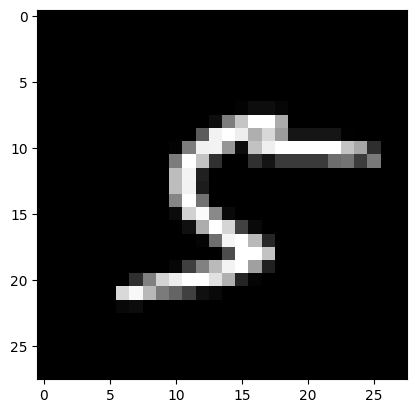

Prediction:  [6]
Label:  6


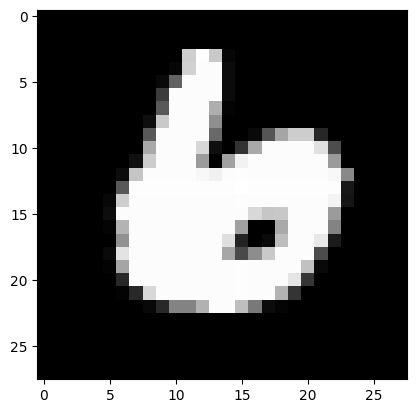

Prediction:  [3]
Label:  3


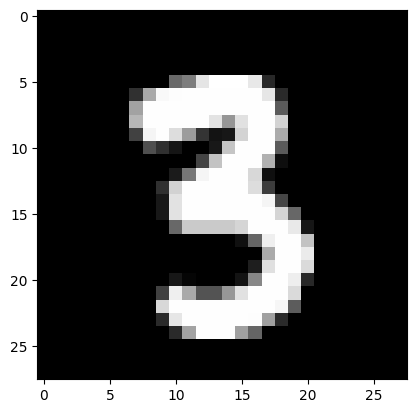

Prediction:  [1]
Label:  1


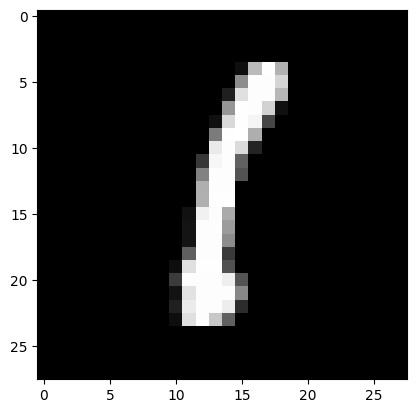

In [91]:
test_prediction(8, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)
test_prediction(22, W1, b1, W2, b2)
test_prediction(33, W1, b1, W2, b2)

In [96]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

0.885